In [10]:
import sys
sys.path.append('..')
sys.path.append('../src')
sys.path.append('../data')

# from src.ablate_heads import Ablate, AblateMultiLen, OVCircuit
from src.experiment import AblateMultiLen, OVCircuit, AttentionPattern, AblateMLP, AllCompenentProject
from src.dataset import TlensDataset, HFDataset  # noqa: E402
# from src.dataset import MyDataset
from src.model import WrapHookedTransformer

from src.myplot import plot_heatmaps, barplot_head
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import einops

torch.set_grad_enabled(False)
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
model = WrapHookedTransformer.from_pretrained("gpt2")
dataset = TlensDataset("../data/full_data_sampled_gpt2.json", model, slice=100)
# dataset = HFDataset("../data/full_data_sampled_gpt2.json", model.tokenizer, slice=600)

Using pad_token, but it is not set yet.


Loaded pretrained model gpt2 into HookedTransformer
Dataset loaded from ../data/full_data_sampled_gpt2.json
Number of samples: 100


In [88]:
dataset.compute_orthogonal(" Apple",model, interval=0.25)

' environment'

In [308]:
dataset.compute_orthogonal(" Apple",model, interval=0.5)

' sequel'

In [336]:
for i in range(200):
    print(dataset.compute_orthogonal(" Apple",model, interval=0.75))

 welcoming
 parad
 Upon
 briefings
 Kash
 unwelcome
 Lama
 pour
 integration
 338
eway
 themed
 enslaved
92
 arming
 Shiny
 scorn
 EDITION
 Setup
 abandoning
 conversation
especially
 hive
 Recover
 melt
 blasp
 quant
 freeing
meat
Running
bie
 chilly
 transportation
ove
 incorrect
brace
 1969
 prosecutor
Par
1
walking
 organizers
efficients
True
 lacks
 associations
 Suzanne
 sincerity
itially
 Hancock
 105
 wart
�
 Extreme
 satisfied
MSN
City
 soluble
piracy
 intro
 sloppy
 priceless
 clearing
 Spa
'd
 physicists
impl
 grap
 e
 Pryor
 rich
ヤ
 incidents
 ashes
 thinker
 fats
 favored
rees
 Ultr
 pers
ooo
 triangular
 Veil
Link
 resent
 examination
diagn
 Bryan
 weaknesses
 Tip
 rocky
Lost
 research
 nail
 cripp
 floods
 toddlers
 Concent
 Exec
 audience
repre
 spir
 melancholy
 dedicate
 lowly
 Beginning
 hike
 favourites
esity
 Comments
 ??
 Header
 Peng
 Design
 Bowl
 plentiful
 Kristen
pins
apers
 haunt
evin
 realizing
 philosopher
 Linear
 move
 ket
 merry
cancer
Myth
 Malfoy
Ed
 

In [177]:
dataset.compute_orthogonal(" Apple",model, interval=1) "Snapchat"

' 80'

## Last position

In [4]:
project = AllCompenentProject(dataset, model, 20)

In [7]:

mem_mlp, cp_mlp, mem_idx, cp_idx = project.project_blocks(target="mlp", return_index=True)
# mem_mlp, cp_mlp = project.project_blocks(target="mlp")

mean_mem_mlp = mem_mlp.mean(dim=-1)
mean_cp_mlp = cp_mlp.mean(dim=-1)
mean_mem_mlp_idx = mem_idx.mean(dim=-1)
mean_cp_mlp_idx = cp_idx.mean(dim=-1)
#round to int the indices
mean_mem_mlp_idx = mean_mem_mlp_idx.round().long()
mean_cp_mlp_idx = mean_cp_mlp_idx.round().long()


data = []
for layer in range(model.cfg.n_layers):
    data.append({
        "component": f"MLP{layer}",
        "prob mem": round(mean_mem_mlp[layer].item(),5),
        "prob cp": round(mean_cp_mlp[layer].item(),5),
        "index mem": mean_mem_mlp_idx[layer].item(),
        "index cp": mean_cp_mlp_idx[layer].item(),
        # "index mem": "NA",
        # "index cp": "NA",
    })

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:12<00:00, 13.00s/it]


In [8]:
mem_resid, cp_resid, mem_idx, cp_idx = project.project_blocks(target="resid", return_index=True)
# mem_resid, cp_resid = project.project_blocks(target="resid")

mean_mem_resid = mem_resid.mean(dim=-1)
mean_cp_resid = cp_resid.mean(dim=-1)
mean_mem_resid_idx = mem_idx.mean(dim=-1)
mean_cp_resid_idx = cp_idx.mean(dim=-1)
round to int the indices
mean_mem_resid_idx = mean_mem_resid_idx.round().long()
mean_cp_resid_idx = mean_cp_resid_idx.round().long()
for layer in range(model.cfg.n_layers):
    data.append({
        "component": f"Residual{layer}",
        "prob mem": round(mean_mem_resid[layer].item(), 5),
        "prob cp": round(mean_cp_resid[layer].item(),5),
        "index mem": mean_mem_resid_idx[layer].item(),
        "index cp": mean_cp_resid_idx[layer].item(),
        # "index mem": "NA",
        # "index cp": "NA",
    })

╭───────────────────────────────────────────────────────────────────────────────────────────╮
│  /tmp/ipykernel_117467/3963842371.py:8                                                    │
│ round to int the indices                                                                  │
│       ▲                                                                                   │
╰───────────────────────────────────────────────────────────────────────────────────────────╯
SyntaxError: invalid syntax

In [9]:
mem_heads, cp_heads, mem_heads_idx, cp_heads_idx = project.project_heads(return_index=True)

mean_mem_head = mem_heads.mean(dim=-1)
mean_cp_head = cp_heads.mean(dim=-1)
mean_mem_heads_idx = mem_heads_idx.mean(dim=-1)
mean_cp_heads_idx = cp_heads_idx.mean(dim=-1)
#round to int the indices
mean_mem_heads_idx = mean_mem_heads_idx.round().long()
mean_cp_heads_idx = mean_cp_heads_idx.round().long()
for layer in range(model.cfg.n_layers):
    for head in range(model.cfg.n_heads):
        data.append({
            "component": f"L{layer}H{head}",
            "prob mem": round(mean_mem_head[layer][head].item(), 5),
            "prob cp": round(mean_cp_head[layer][head].item(),5),
            "index mem": mean_mem_heads_idx[layer].item(),
            "index cp": mean_cp_heads_idx[layer].item(),
            # "index mem": "NA",
            # "index cp": "NA",
        })

  0%|          | 0/1 [04:02<?, ?it/s]


╭──────────────────────────── Traceback (most recent call last) ────────────────────────────╮
│                                                                                           │
│ /tmp/ipykernel_117467/3404005851.py:1 in <module>                                         │
│                                                                                           │
│ [Errno 2] No such file or directory: '/tmp/ipykernel_117467/3404005851.py'                │
│ /home/francesco/Repository/Competition_of_Mechanisms/notebooks/../src/experiment/ablate.p │
│ y:570 in project_heads                                                                    │
│                                                                                           │
│   567 │   │   result_cp_idx = {}                                                          │
│   568 │   │   for l in lengths:                                                           │
│   569 │   │   │   # mem, cp, mem_idx, cp_idx = self.project_heads_single_len(l)           │
│ ❱ 570 │   │   │   mem, cp = self.project_heads_single_len(l, return_index=return_index)   │
│   571 │   │   │   if mem is not None:                                                     │
│   572 │   │   │   │   result_mem[l] = mem                                                 │
│   573 │   │   │   │   result_cp[l] = cp                                                   │
│                                                                                           │
│ /home/francesco/Repository/Competition_of_Mechanisms/notebooks/../src/experiment/ablate.p │
│ y:530 in project_heads_single_len                                                         │
│                                                                                           │
│   527 │   │   │   │   │   logit_output = einops.einsum(self.model.W_U, output_head[:, -1, │
│   528 │   │   │   │   │   logit_output = self.model.ln_final(logit_output)                │
│   529 │   │   │   │   │   if return_index:                                                │
│ ❱ 530 │   │   │   │   │   │   tmp_mem, tmp_cp, tmp_mem_idx, tmp_cp_idx = to_logit_token(l │
│   531 │   │   │   │   │   else:                                                           │
│   532 │   │   │   │   │   │   tmp_mem , tmp_cp = to_logit_token(logit_output, batch["targ │
│   533 │   │   │   │   │   mem_logit[layer][head].append(tmp_mem.cpu())                    │
│                                                                                           │
│ /home/francesco/Repository/Competition_of_Mechanisms/notebooks/../src/base_experiment.py: │
│ 30 in to_logit_token                                                                      │
│                                                                                           │
│    27 │   │   for i in range(target.shape[0]):                                            │
│    28 │   │   │   sorted_indices = torch.argsort(logit[i], descending=True).tolist()      │
│    29 │   │   │   index_mem[i] = sorted_indices.index(target[i, 0])                       │
│ ❱  30 │   │   │   index_cp[i] = sorted_indices.index(target[i, 1])                        │
│    31 │                                                                                   │
│    32 │   for i in range(target.shape[0]):                                                │
│    33 │   │   logit_mem[i] = logit[i, target[i, 0]]                                       │
╰───────────────────────────────────────────────────────────────────────────────────────────╯
KeyboardInterrupt

In [12]:
mem_heads, cp_heads = project.project_heads()
mean_mem_head = mem_heads.mean(dim=-1)
mean_cp_head = cp_heads.mean(dim=-1)

# data = []
for layer in range(model.cfg.n_layers):
    for head in range(model.cfg.n_heads):
        data.append({
            "component": f"L{layer}H{head}",
            "prob mem": round(mean_mem_head[layer][head].item(), 5),
            "prob cp": round(mean_cp_head[layer][head].item(),5),
            # "index mem": mean_mem_heads_idx[layer].item(),
            # "index cp": mean_cp_heads_idx[layer].item(),
            "index mem": "NA",
            "index cp": "NA",
        })

100%|██████████| 1/1 [00:00<00:00,  5.59it/s]


In [14]:
import pandas as pd
df = pd.DataFrame(data)
df.to_csv("../results/all_component.csv", index=False)

In [21]:
mem_heads, cp_heads, mem_heads_idx, cp_heads_idx = project.project_heads()


mean_mem_head = mem_heads.mean(dim=-1)
mean_cp_head = cp_heads.mean(dim=-1)
mean_mem_heads_idx = mem_heads_idx.mean(dim=-1)
mean_cp_heads_idx = cp_heads_idx.mean(dim=-1)
#round to int the indices
mean_mem_heads_idx = mean_mem_heads_idx.round().long()
mean_cp_heads_idx = mean_cp_heads_idx.round().long()
data = []
for layer in range(model.cfg.n_layers):
    for head in range(model.cfg.n_heads):
        data.append({
            "component": f"L{layer}H{head}",
            "prob mem": round(mean_mem_head[layer][head].item(), 5),
            "prob cp": round(mean_cp_head[layer][head].item(),5),
            "index mem": mean_mem_heads_idx[layer].item(),
            "index cp": mean_cp_heads_idx[layer].item(),
            "index mem": "NA",
            "index cp": "NA",
        })

  0%|          | 0/1 [00:00<?, ?it/s]

layer 0 head 0
layer 0 head 1
layer 0 head 2
layer 0 head 3
layer 0 head 4
layer 0 head 5
layer 0 head 6
layer 0 head 7
layer 0 head 8
layer 0 head 9
layer 0 head 10
layer 0 head 11


layer 1 head 0
layer 1 head 1
layer 1 head 2
layer 1 head 3
layer 1 head 4
layer 1 head 5
layer 1 head 6
layer 1 head 7
layer 1 head 8
layer 1 head 9
layer 1 head 10
layer 1 head 11


layer 2 head 0
layer 2 head 1
layer 2 head 2
layer 2 head 3
layer 2 head 4
layer 2 head 5
layer 2 head 6
layer 2 head 7
layer 2 head 8
layer 2 head 9
layer 2 head 10
layer 2 head 11


layer 3 head 0
layer 3 head 1
layer 3 head 2
layer 3 head 3
layer 3 head 4
layer 3 head 5
layer 3 head 6
layer 3 head 7
layer 3 head 8
layer 3 head 9
layer 3 head 10
layer 3 head 11


layer 4 head 0
layer 4 head 1
layer 4 head 2
layer 4 head 3
layer 4 head 4
layer 4 head 5
layer 4 head 6
layer 4 head 7
layer 4 head 8
layer 4 head 9
layer 4 head 10
layer 4 head 11


layer 5 head 0
layer 5 head 1
layer 5 head 2
layer 5 head 3
layer 5 head 4
layer 5 head 5
layer 5 head 6
layer 5 head 7
layer 5 head 8
layer 5 head 9
layer 5 head 10
layer 5 head 11


layer 6 head 0
layer 6 head 1
layer 6 head 2
layer 6 head 3
layer 6 head 4
layer 6 head 5
layer 6 head 6
layer 6 head 7
layer 6 head 8
layer 6 head 9
layer 6 head 10
layer 6 head 11


layer 7 head 0
layer 7 head 1
layer 7 head 2
layer 7 head 3
layer 7 head 4
layer 7 head 5
layer 7 head 6
layer 7 head 7
layer 7 head 8
layer 7 head 9
layer 7 head 10
layer 7 head 11


layer 8 head 0
layer 8 head 1
layer 8 head 2
layer 8 head 3
layer 8 head 4
layer 8 head 5
layer 8 head 6
layer 8 head 7
layer 8 head 8
layer 8 head 9
layer 8 head 10
layer 8 head 11


layer 9 head 0
layer 9 head 1
layer 9 head 2
layer 9 head 3
layer 9 head 4
layer 9 head 5
layer 9 head 6
layer 9 head 7
layer 9 head 8
layer 9 head 9
layer 9 head 10
layer 9 head 11


layer 10 head 0
layer 10 head 1


  0%|          | 0/1 [09:02<?, ?it/s]

layer 10 head 2


╭──────────────────────────── Traceback (most recent call last) ────────────────────────────╮
│                                                                                           │
│ /tmp/ipykernel_50932/1411087963.py:1 in <module>                                          │
│                                                                                           │
│ [Errno 2] No such file or directory: '/tmp/ipykernel_50932/1411087963.py'                 │
│ /home/francesco/Repository/Competition_of_Mechanisms/notebooks/../src/experiment/ablate.p │
│ y:565 in project_heads                                                                    │
│                                                                                           │
│   562 │   │   result_cp_idx = {}                                                          │
│   563 │   │   for l in lengths:                                                           │
│   564 │   │   │   # mem, cp, mem_idx, cp_idx = self.project_heads_single_len(l)           │
│ ❱ 565 │   │   │   mem, cp = self.project_heads_single_len(l)                              │
│   566 │   │   │   if mem is not None:                                                     │
│   567 │   │   │   │   result_mem[l] = mem                                                 │
│   568 │   │   │   │   result_cp[l] = cp                                                   │
│                                                                                           │
│ /home/francesco/Repository/Competition_of_Mechanisms/notebooks/../src/experiment/ablate.p │
│ y:529 in project_heads_single_len                                                         │
│                                                                                           │
│   526 │   │   │   │   │   output_head = einops.einsum(cache[f"blocks.{layer}.attn.hook_z" │
│   527 │   │   │   │   │   logit_output = einops.einsum(self.model.W_U, output_head[:, -1, │
│   528 │   │   │   │   │   logit_output = self.model.ln_final(logit_output)                │
│ ❱ 529 │   │   │   │   │   tmp_mem, tmp_cp, tmp_mem_idx, tmp_cp_idx = to_logit_token(logit │
│   530 │   │   │   │   │   # tmp_mem , tmp_cp = to_logit_token(logit_output, batch["target │
│   531 │   │   │   │   │   mem_logit[layer][head].append(tmp_mem.cpu())                    │
│   532 │   │   │   │   │   cp_logit[layer][head].append(tmp_cp.cpu())                      │
│                                                                                           │
│ /home/francesco/Repository/Competition_of_Mechanisms/notebooks/../src/base_experiment.py: │
│ 28 in to_logit_token                                                                      │
│                                                                                           │
│    25 │                                                                                   │
│    26 │   if return_index:                                                                │
│    27 │   │   for i in range(target.shape[0]):                                            │
│ ❱  28 │   │   │   sorted_indices = torch.argsort(logit[i], descending=True).tolist()      │
│    29 │   │   │   index_mem[i] = sorted_indices.index(target[i, 0])                       │
│    30 │   │   │   index_cp[i] = sorted_indices.index(target[i, 1])                        │
│    31                                                                                     │
╰───────────────────────────────────────────────────────────────────────────────────────────╯
KeyboardInterrupt

In [16]:
import pandas as pd
data_saved = pd.read_csv("../results/logit_lens_last_pos.csv")

In [18]:
## append data to data_saved
df = pd.DataFrame(data)
df = pd.concat([data_saved, df])

In [20]:
df.to_csv("../results/logit_lens_last_pos_all.csv", index=False)

# MLP

In [4]:
ablator = AblateMLP(dataset, model, 20)
mlp_mem, mlp_cp, base_mem, base_cp = ablator.ablate_multi_len(target="mlp", interval=0)

Ablating examples of length 25 ...


Ablating batches:   0%|          | 0/48 [00:11<?, ?it/s]


╭──────────────────────────── Traceback (most recent call last) ────────────────────────────╮
│                                                                                           │
│ /tmp/ipykernel_9208/3334144401.py:2 in <module>                                           │
│                                                                                           │
│ [Errno 2] No such file or directory: '/tmp/ipykernel_9208/3334144401.py'                  │
│ /home/francesco/Repository/Competition_of_Mechanisms/notebooks/../src/experiment/ablate.p │
│ y:490 in ablate_multi_len                                                                 │
│                                                                                           │
│   487 │   │   base_logit_cp = {}                                                          │
│   488 │   │   for l in lenghts:                                                           │
│   489 │   │   │   print("Ablating examples of length", l, "...")                          │
│ ❱ 490 │   │   │   mem, cp, b_mem,b_cp = self.ablate_single_len(l,target, interval=interva │
│   491 │   │   │   if mem is not None and cp is not None:                                  │
│   492 │   │   │   │   result_mem_per_len[l], result_cp_per_len[l] = mem, cp               │
│   493 │   │   │   │   base_logit_mem[l], base_logit_cp[l] = b_mem, b_cp                   │
│                                                                                           │
│ /home/francesco/Repository/Competition_of_Mechanisms/notebooks/../src/experiment/ablate.p │
│ y:437 in ablate_single_len                                                                │
│                                                                                           │
│   434 │   │   │   │   │                                                                   │
│   435 │   │   │   │   │   list_hooks = list(tmp_hooks.values())                           │
│   436 │   │   │   │   │   self.model.reset_hooks()                                        │
│ ❱ 437 │   │   │   │   │   logit = self.model.run_with_hooks( # type: ignore               │
│   438 │   │   │   │   │   │   batch["corrupted_prompts"],                                 │
│   439 │   │   │   │   │   │   fwd_hooks=list_hooks,                                       │
│   440 │   │   │   │   │   )[:, -1, :]                                                     │
│                                                                                           │
│ /home/francesco/anaconda3/envs/torch/lib/python3.10/site-packages/transformer_lens/hook_p │
│ oints.py:376 in run_with_hooks                                                            │
│                                                                                           │
│   373 │   │   │   ):                                                                      │
│   374 │   │   │   │   return self.forward(*model_args, **model_kwargs), cache_dict        │
│   375 │   │                                                                               │
│ ❱ 376 │   │   with self.hooks(                                                            │
│   377 │   │   │   fwd_hooks, bwd_hooks, reset_hooks_end, clear_contexts                   │
│   378 │   │   ) as hooked_model:                                                          │
│   379 │   │   │   return hooked_model.forward(*model_args, **model_kwargs)                │
│                                                                                           │
│ /home/francesco/anaconda3/envs/torch/lib/python3.10/contextlib.py:135 in __enter__        │
│                                                                                           │
│   132 │   │   # they are only needed for recreation, which is not possible anymore        │
│   133 │   │   del self.args, self.kwds, self.func                                         │
│   134 │   │   try:                                

In [5]:
mlp_mem = torch.load("../results/mlp_mem.pt")
mlp_cp = torch.load("../results/mlp_cp.pt")
attn_mem = torch.load("../results/attn_mem.pt")
attn_cp = torch.load("../results/attn_cp.pt")

torch.Size([9200, 12, 13])

In [23]:
base_mean = (base_mem - base_cp).mean()

def percentage_change(mem, cp):
    return 100*(((mem - cp).mean(0).abs() -base_mean) / base_mean)

tensor(-3.2805)


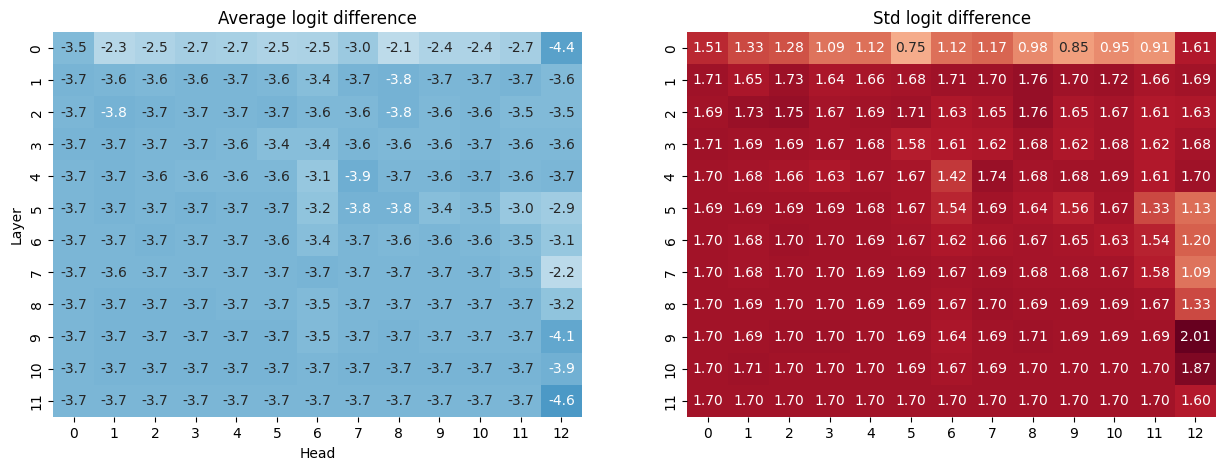

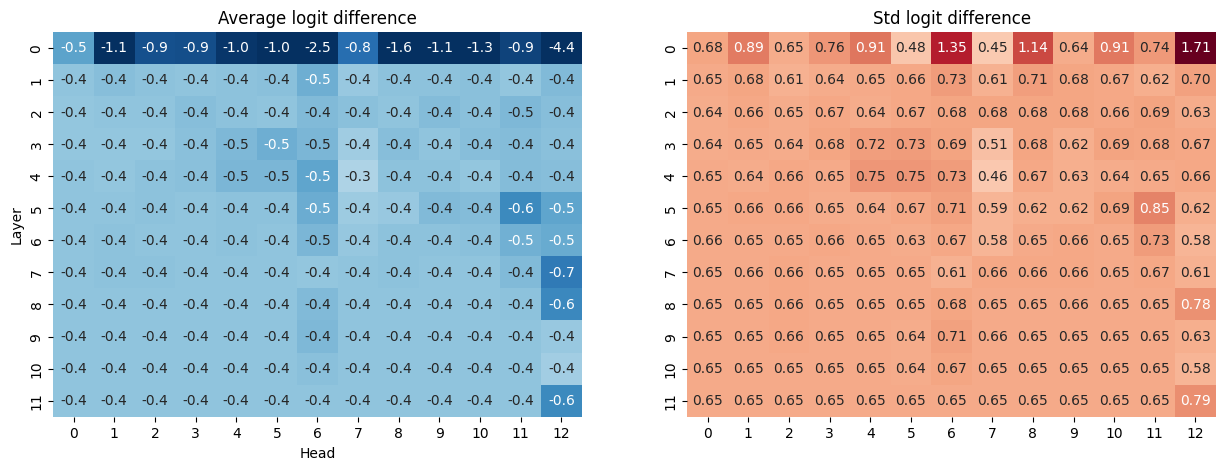

In [55]:
# mlp_mem, mlp_cp, base_mem, base_cp = ablator.ablate_multi_len(target="attn", interval=0)
base_mean = (base_mem - base_cp).mean()
print(base_mean)
plot_heatmaps(mlp_mem.mean(0), mlp_mem.std(0), title="MLP", interval=8)
plot_heatmaps(mlp_cp.mean(0), mlp_cp.std(0), title="MLP", interval=1)

Ablating examples of length 25 ...
Ablating examples of length 21 ...


100%|██████████| 1/1 [00:00<00:00, 17.96it/s]


Ablating examples of length 19 ...


100%|██████████| 1/1 [00:00<00:00, 19.55it/s]


Ablating examples of length 23 ...
Ablating examples of length 17 ...
Ablating examples of length 27 ...
Ablating examples of length 29 ...
Ablating examples of length 31 ...
Ablating examples of length 33 ...
tensor(-5.3929)


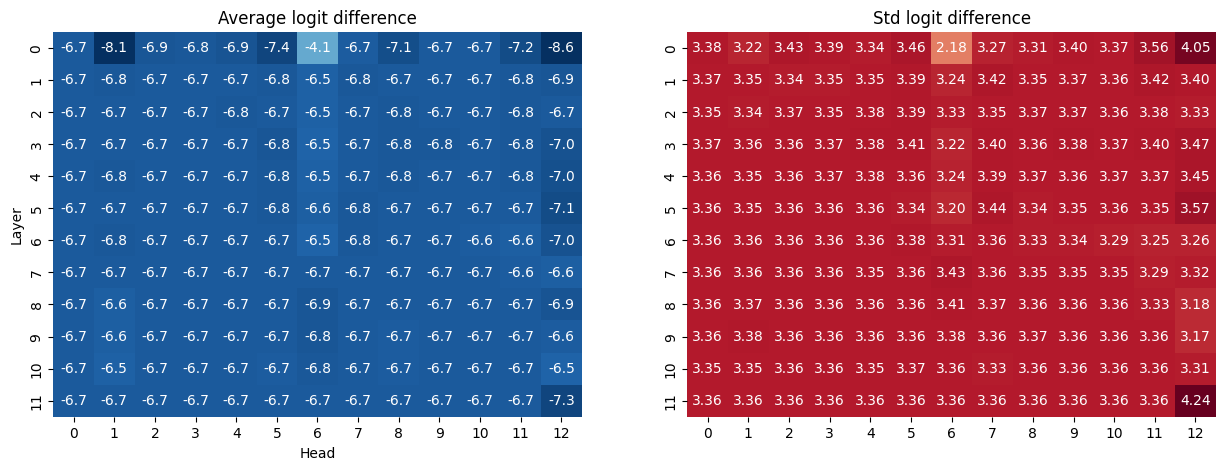

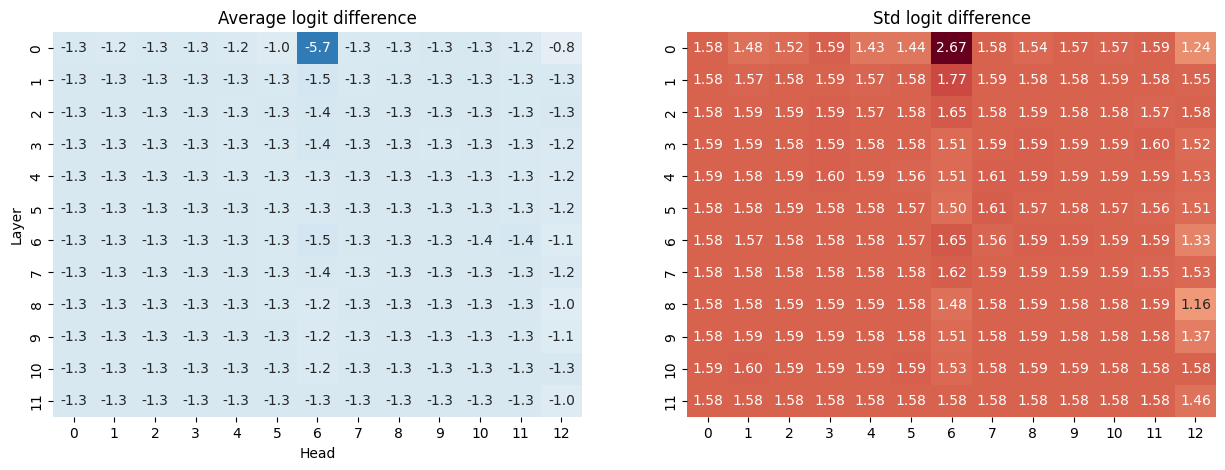

In [50]:
mlp_mem, mlp_cp, base_mem, base_cp = ablator.ablate_multi_len(target="mlp", interval=0.25)
base_mean = (base_mem - base_cp).mean()
print(base_mean)
plot_heatmaps(mlp_mem.mean(0), mlp_mem.std(0), title="MLP", interval=8)
plot_heatmaps(mlp_cp.mean(0), mlp_cp.std(0), title="MLP", interval=8)

Ablating examples of length 25 ...
Ablating examples of length 21 ...


100%|██████████| 1/1 [00:00<00:00, 17.98it/s]


Ablating examples of length 19 ...


100%|██████████| 1/1 [00:00<00:00, 19.44it/s]


Ablating examples of length 23 ...
Ablating examples of length 17 ...
Ablating examples of length 27 ...
Ablating examples of length 29 ...
Ablating examples of length 31 ...
Ablating examples of length 33 ...
tensor(-5.7684)


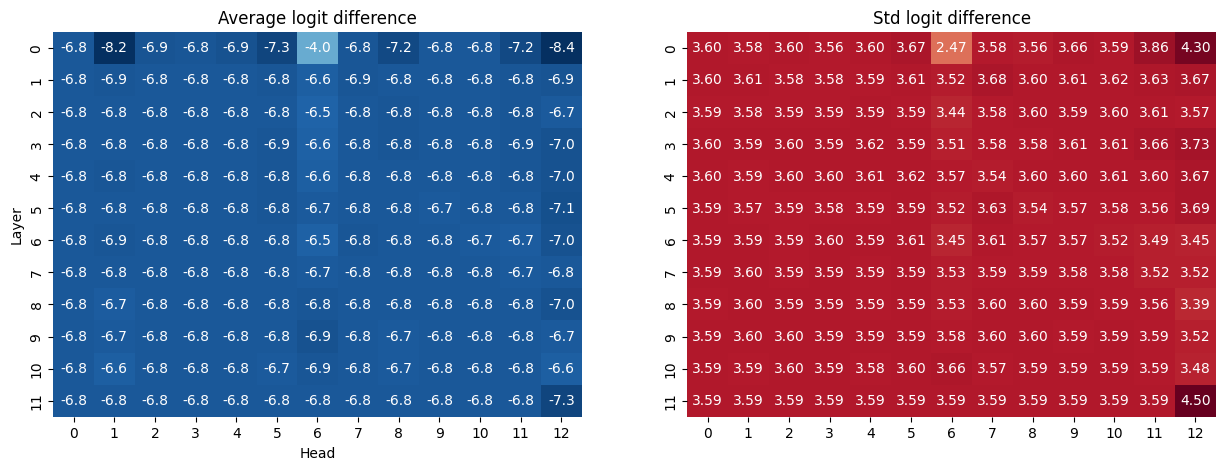

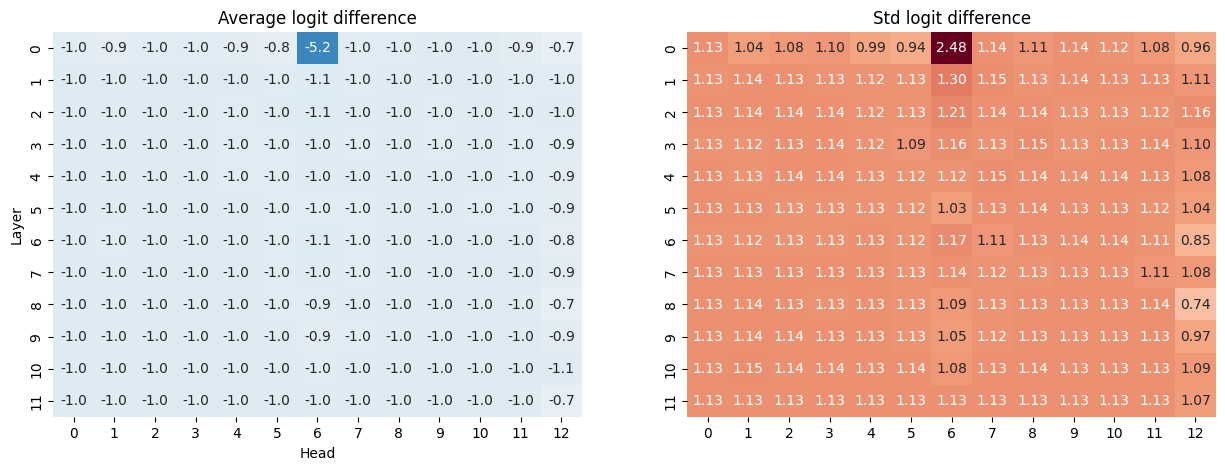

In [51]:
mlp_mem, mlp_cp, base_mem, base_cp = ablator.ablate_multi_len(target="mlp", interval=0.5)
base_mean = (base_mem - base_cp).mean()
print(base_mean)
plot_heatmaps(mlp_mem.mean(0), mlp_mem.std(0), title="MLP", interval=8)
plot_heatmaps(mlp_cp.mean(0), mlp_cp.std(0), title="MLP", interval=8)

Ablating examples of length 25 ...
Ablating examples of length 21 ...


100%|██████████| 1/1 [00:00<00:00, 17.74it/s]


Ablating examples of length 19 ...


100%|██████████| 1/1 [00:00<00:00, 19.43it/s]


Ablating examples of length 23 ...
Ablating examples of length 17 ...
Ablating examples of length 27 ...
Ablating examples of length 29 ...
Ablating examples of length 31 ...
Ablating examples of length 33 ...
tensor(-6.5161)


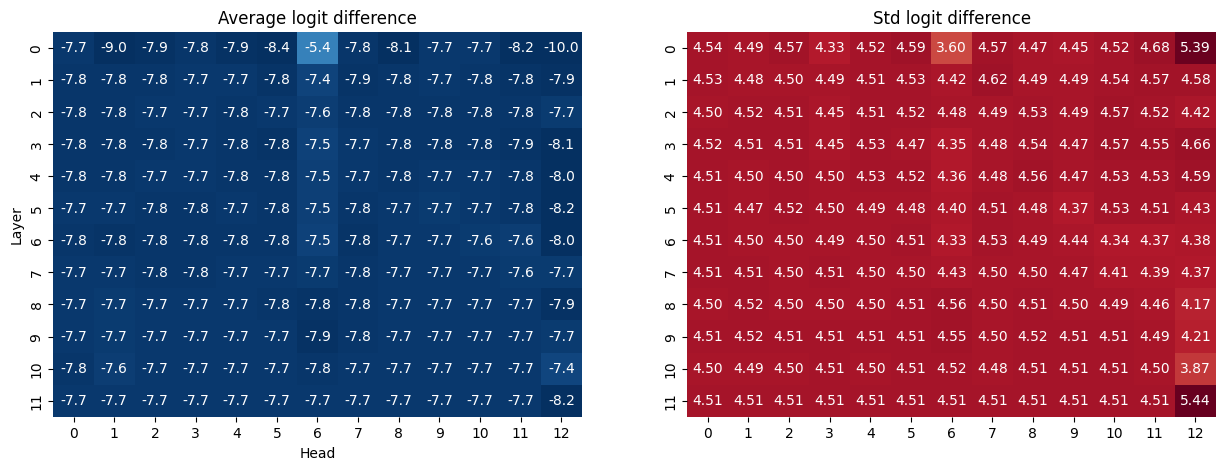

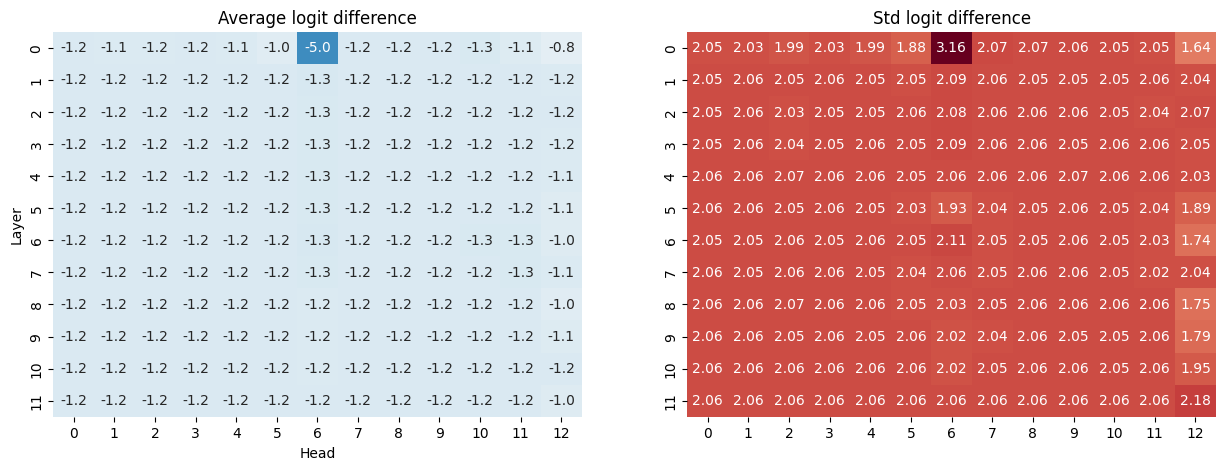

In [53]:
mlp_mem, mlp_cp, base_mem, base_cp = ablator.ablate_multi_len(target="mlp", interval=0.75)
base_mean = (base_mem - base_cp).mean()
print(base_mean)
plot_heatmaps(mlp_mem.mean(0), mlp_mem.std(0), title="MLP", interval=8)
plot_heatmaps(mlp_cp.mean(0), mlp_cp.std(0), title="MLP", interval=8)

tensor(-4.7773)


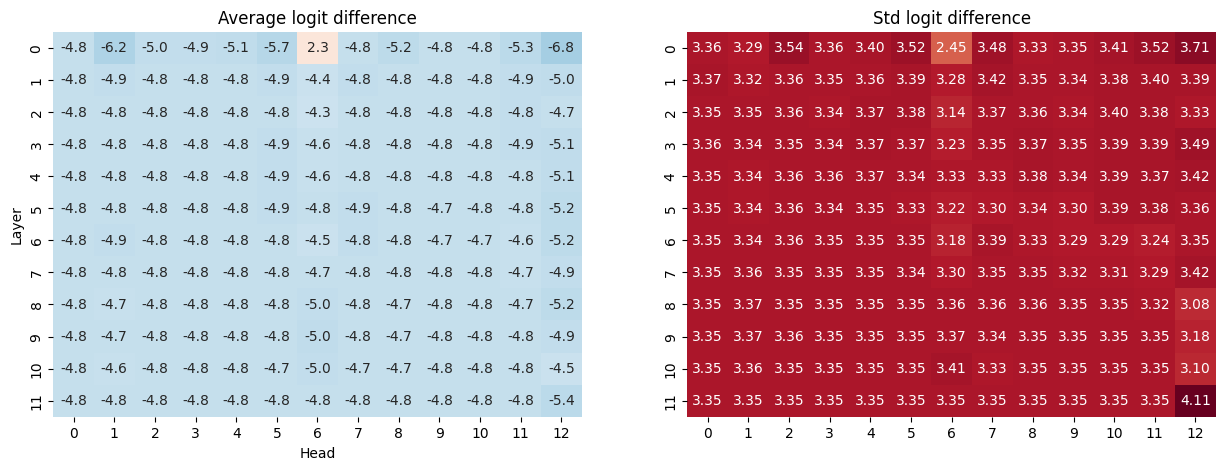

In [42]:
# mlp_mem, mlp_cp, base_mem, base_cp = ablator.ablate_multi_len(target="mlp", interval=1)
base_mean = (base_mem - base_cp).mean()
print(base_mean)
plot_heatmaps((mlp_mem - mlp_cp).mean(0), mlp_mem.std(0), title="MLP", interval=20)

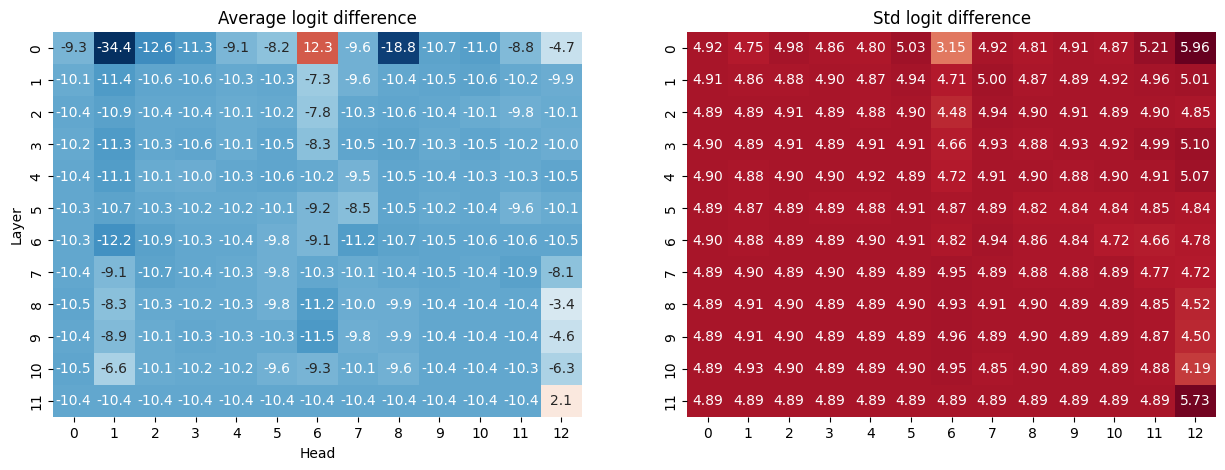

In [27]:
plot_heatmaps((mlp_mem - mlp_cp).mean(0), mlp_mem.std(0), title="MLP", interval=20)

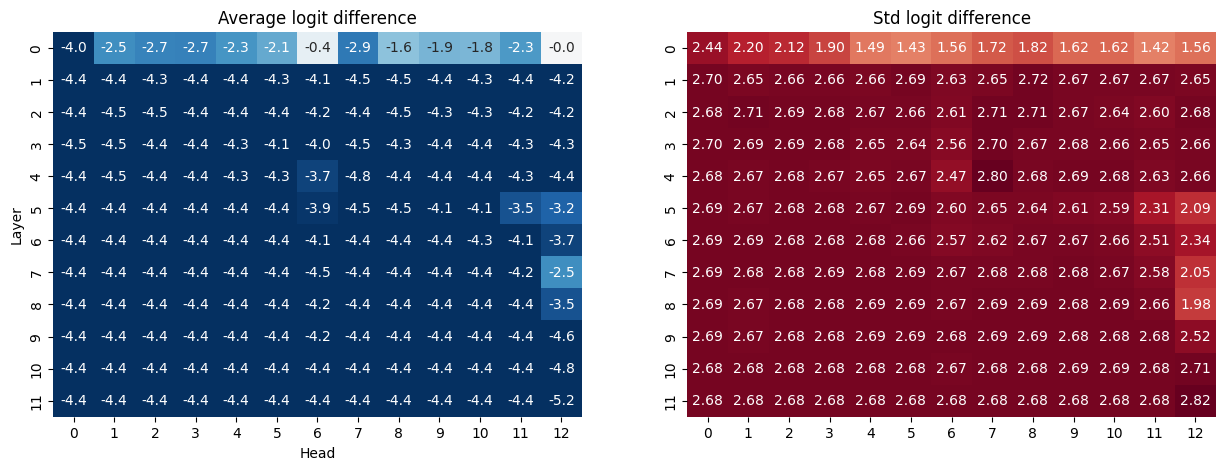

In [100]:
plot_heatmaps((attn_mem - attn_cp).mean(0), attn_mem.std(0), title="MLP", interval=4)

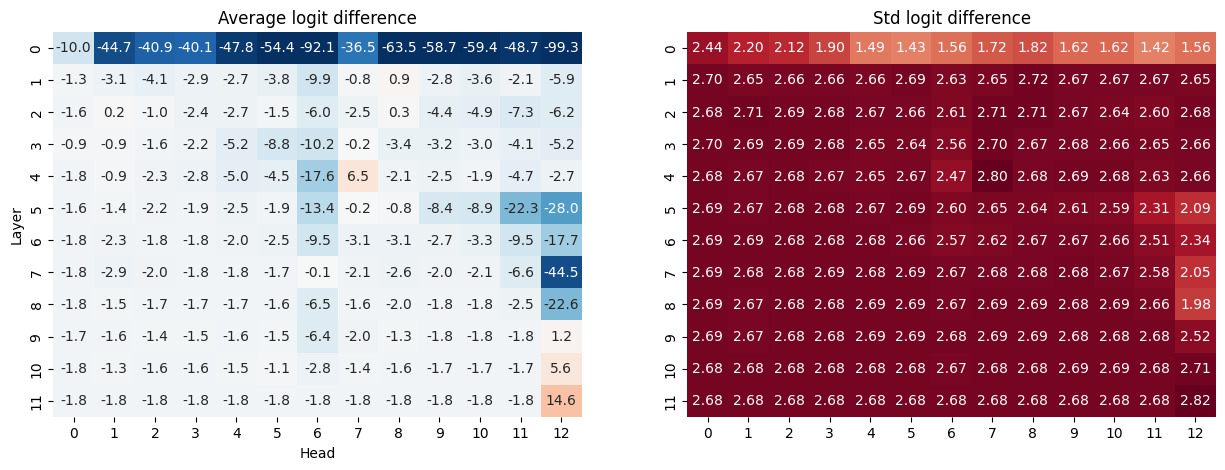

In [104]:
plot_heatmaps(percentage_change(attn_mem, attn_cp), attn_mem.std(0), title="MLP", interval=50)

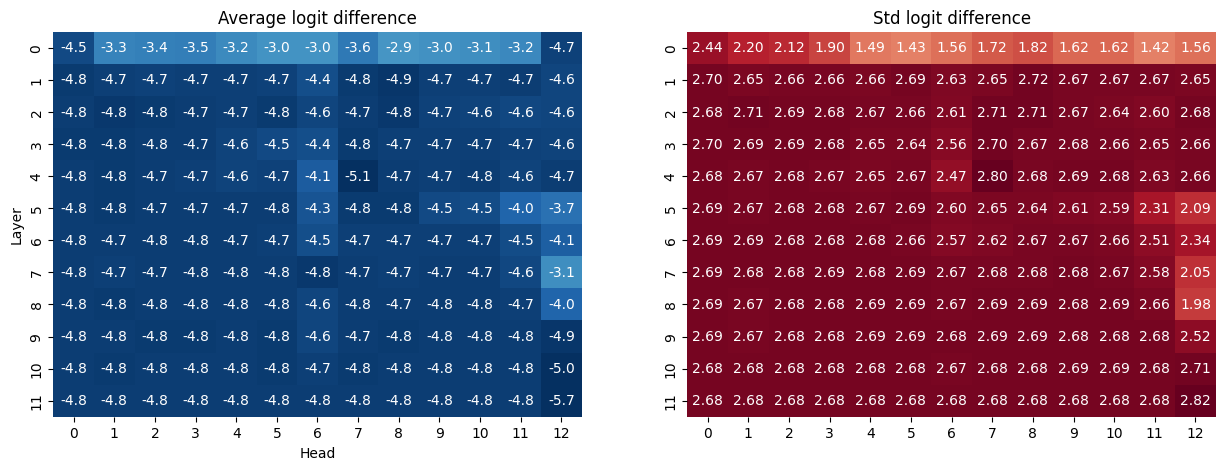

In [106]:
plot_heatmaps(attn_mem.mean(0), attn_mem.std(0), title="MLP", interval=5)

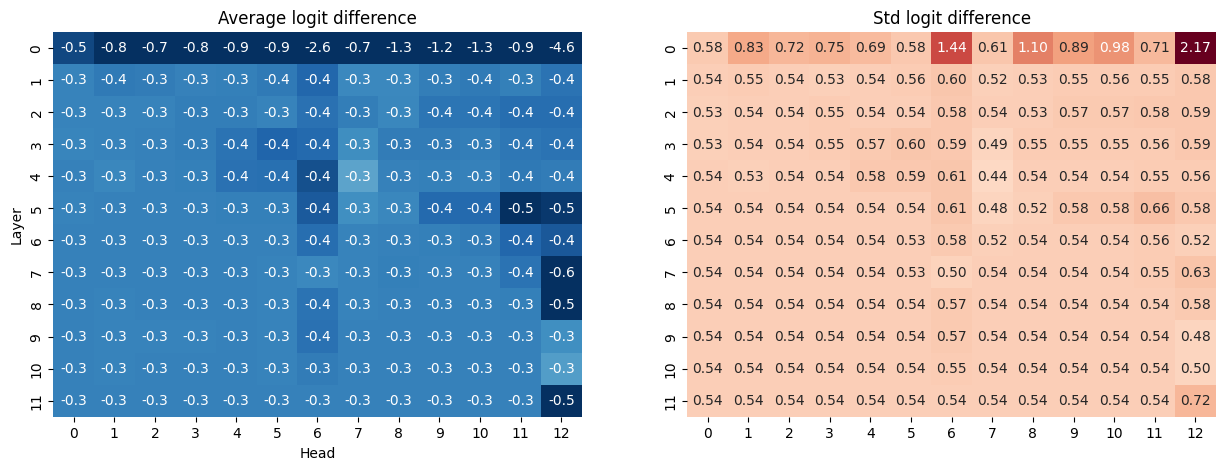

In [109]:
plot_heatmaps(attn_cp.mean(0), attn_cp.std(0), title="MLP", interval=0.5)

## Attention

In [ ]:
attn_mem, attn_cp = ablator.ablate_multi_len(target="attn")

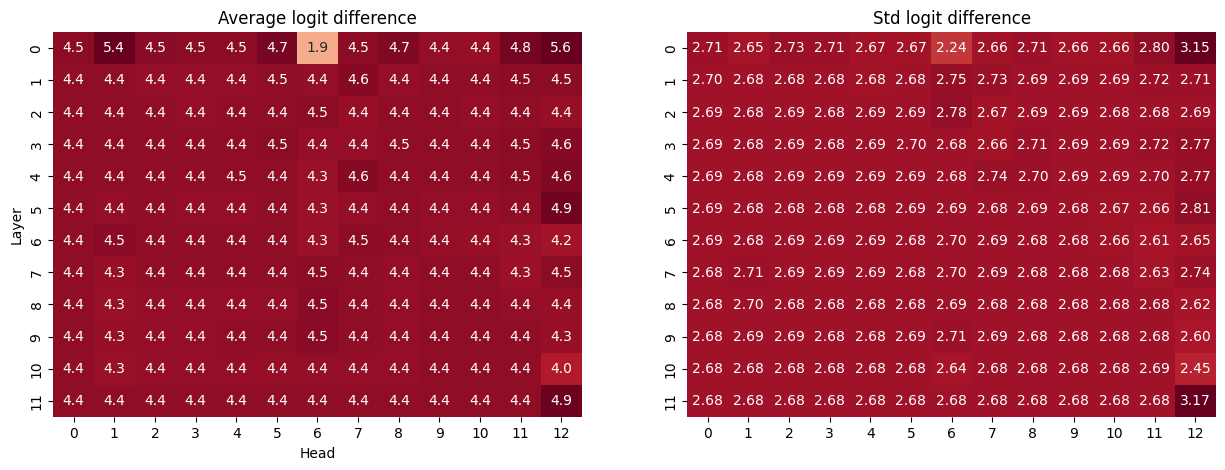

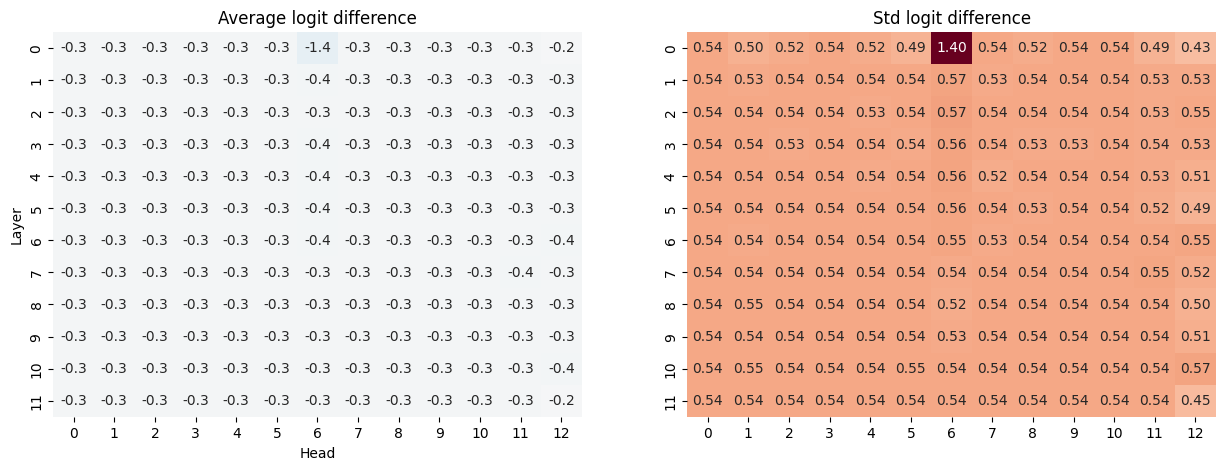

In [8]:
plot_heatmaps((mlp_mem.mean(0) - mlp_cp.mean(0)).abs(), mlp_mem.std(0), title="MLP", interval=5)
plot_heatmaps(mlp_cp.mean(0), mlp_cp.std(0), title="MLP", interval=15)

In [11]:
logit,cache = model.run_with_cache("ciao")

In [14]:
cache["blocks.0.hook_attn_out"].shape

torch.Size([1, 3, 768])

## Project component

In [56]:
from src.experiment.ablate import AllCompenentProject


project = AllCompenentProject(dataset, model, 20)

In [67]:
mem_mlp, cp_mlp = project.project_blocks(target="mlp")

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  2.09it/s]


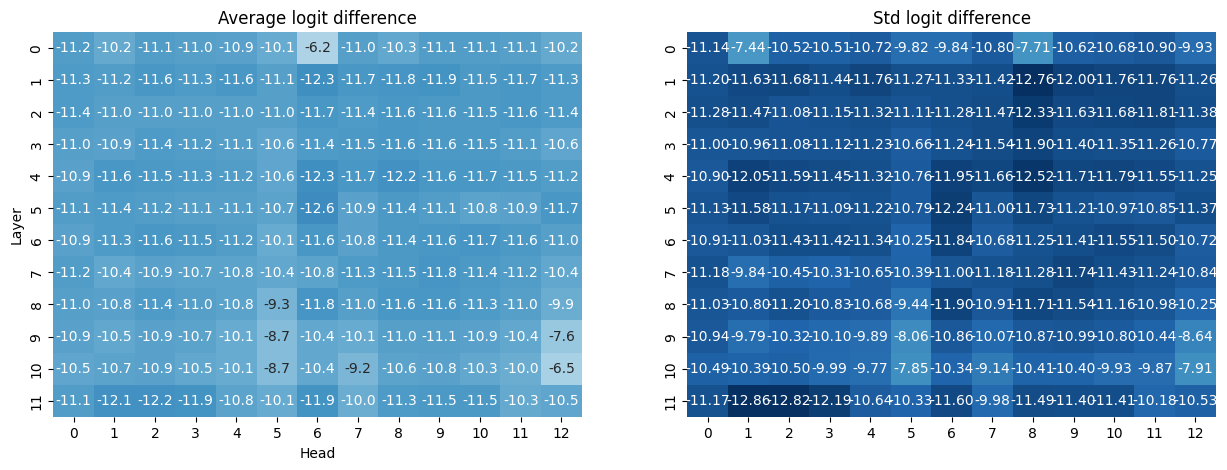

In [68]:
plot_heatmaps(cp_mlp.mean(0), mem_mlp.mean(0), title="MLP", interval=20)

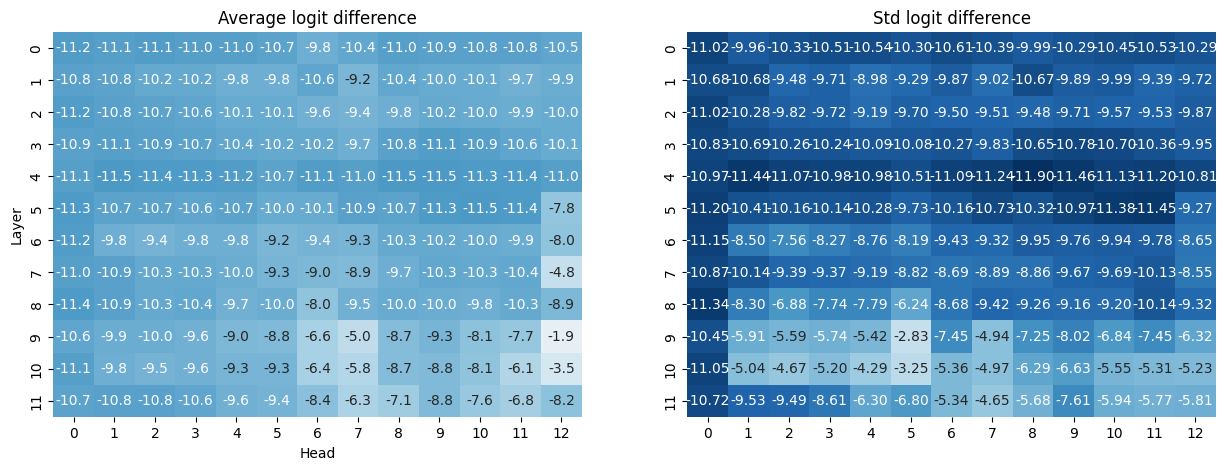

In [62]:
plot_heatmaps(cp_attn.mean(0) ,  mem_attn.mean(0), title="MLP", interval=20)

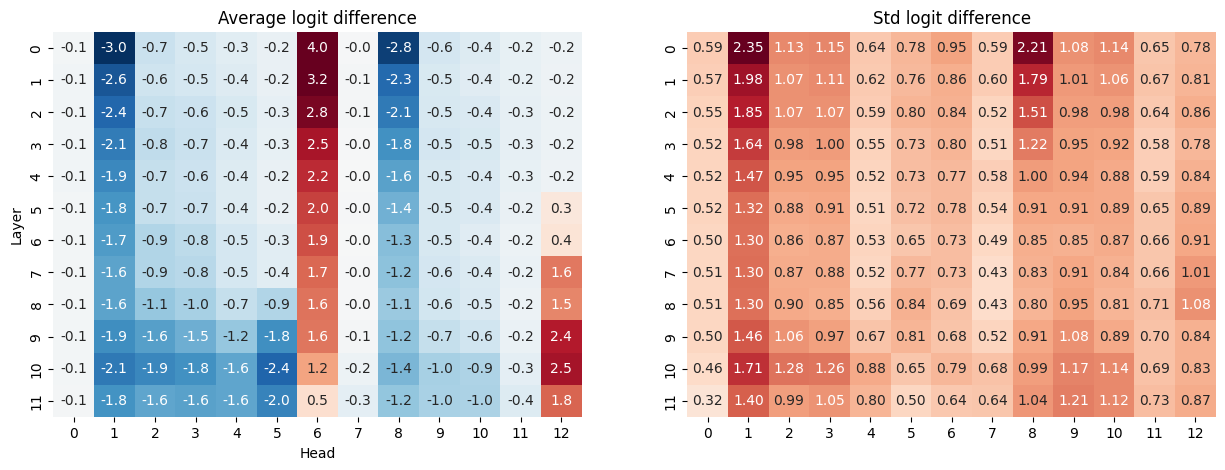

In [33]:
plot_heatmaps(cp_mlp.mean(0) - mem_mlp.mean(0), mem_mlp.std(0), title="MLP", interval=3)

PearsonRResult(statistic=0.178470211175767, pvalue=1.0932908173843286e-05)


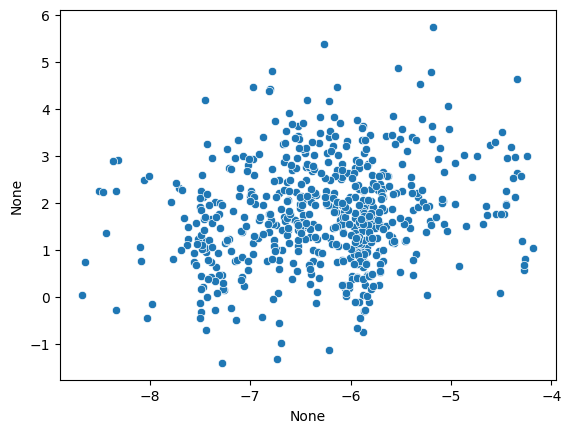

In [52]:
import seaborn as sns
sns.scatterplot(x=cp_mlp[:,0,6], y=(cp_resid - mem_resid)[:,-1,-1])
from scipy.stats import pearsonr
print(pearsonr(cp_mlp[:,0,6], (cp_resid - mem_resid)[:,-1,-1]))

PearsonRResult(statistic=-0.1772117219407276, pvalue=1.2634849734720626e-05)


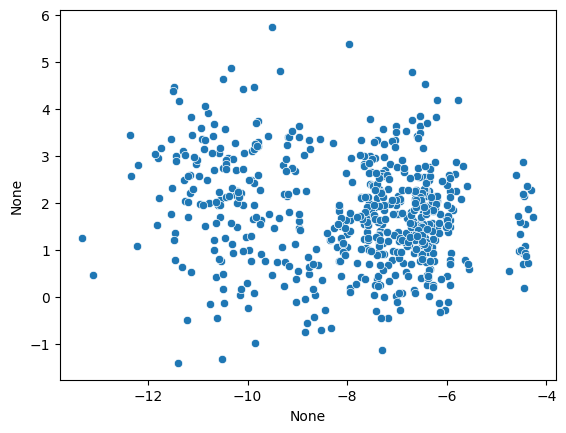

In [53]:
import seaborn as sns
sns.scatterplot(x=mem_mlp[:,0,8], y=(cp_resid - mem_resid)[:,-1,-1])
from scipy.stats import pearsonr
print(pearsonr(mem_mlp[:,0,8], (cp_resid - mem_resid)[:,-1,-1]))

In [4]:
mem_head = torch.load("../results/head_mem.pt")
cp_head = torch.load("../results/head_cp.pt")

In [5]:
mem_head.shape

torch.Size([12, 12, 10000])

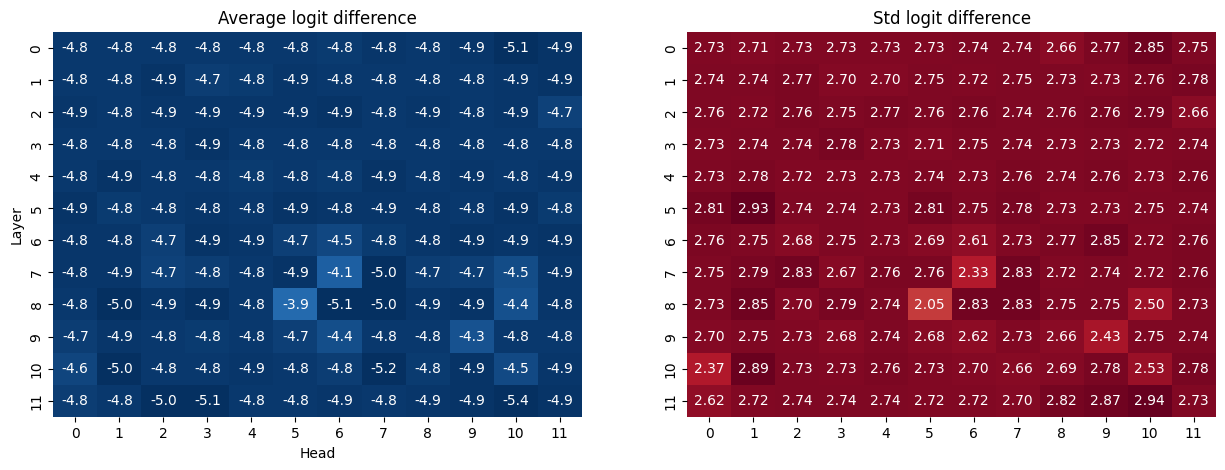

In [7]:
plot_heatmaps(mem_head.mean(-1), mem_head.std(-1), title="MLP", interval=5)

In [42]:
batch = ablator.get_batch(20)

## Track

In [20]:
circuit = OVCircuit(dataset, model, 20)

In [21]:
mem_score_attn = circuit.residual_stram_track_target_all_len(target="mem", component="attn_out")
plot_heatmaps(mem_score_attn, mem_score_attn, title="MLP", interval=50)

OV circuit at all heads 25:  71%|███████▏  | 35/49 [00:27<00:10,  1.29it/s]


╭──────────────────────────── Traceback (most recent call last) ────────────────────────────╮
│                                                                                           │
│ /tmp/ipykernel_84783/3569616053.py:1 in <module>                                          │
│                                                                                           │
│ [Errno 2] No such file or directory: '/tmp/ipykernel_84783/3569616053.py'                 │
│ /home/francesco/Repository/Competition_of_Mechanisms/notebooks/../src/experiment/ov_resid │
│ ual.py:248 in residual_stram_track_target_all_len                                         │
│                                                                                           │
│   245 │   │   lenghts = self.dataset.get_lengths()                                        │
│   246 │   │   result = {}                                                                 │
│   247 │   │   for l in lenghts:                                                           │
│ ❱ 248 │   │   │   residual = self.residual_stram_track_target(length=l, target=target, di │
│   249 │   │   │   if residual is not None:                                                │
│   250 │   │   │   │   result[l] = residual                                                │
│   251 │   │   result_score = torch.stack(list(result.values()), dim=0).mean(dim=0)        │
│                                                                                           │
│ /home/francesco/Repository/Competition_of_Mechanisms/notebooks/../src/experiment/ov_resid │
│ ual.py:206 in residual_stram_track_target                                                 │
│                                                                                           │
│   203 │   │   │   │   │   residual_stream = cache[component, layer]                       │
│   204 │   │   │   │   │   logit_output = einops.einsum(self.model.W_U, residual_stream[:, │
│   205 │   │   │   │   │   logit_output = self.model.ln_final(logit_output)                │
│ ❱ 206 │   │   │   │   │   mem_logit, cp_logit = to_logit_token(logit_output, batch["targe │
│   207 │   │   │   │   │   if target == "copy":                                            │
│   208 │   │   │   │   │   │   logit_target_list[layer][pos].append(cp_logit.cpu())        │
│   209 │   │   │   │   │   │   # logit_target[layer, pos, idx] = cp_logit.cpu()            │
│                                                                                           │
│ /home/francesco/Repository/Competition_of_Mechanisms/notebooks/../src/base_experiment.py: │
│ 36 in to_logit_token                                                                      │
│                                                                                           │
│    33 │   │   logit_mem[i] = logit[i, target[i, 0]]                                       │
│    34 │   │   #save the position of target[i, 0] in the logit sorted                      │
│    35 │   │   # index_mem[i] = torch.argsort(logit[i], descending=True).tolist().index(ta │
│ ❱  36 │   │   logit_cp[i] = logit[i, target[i, 1]]                                        │
│    37 │   │   # index_cp[i] = torch.argsort(logit[i], descending=True).tolist().index(tar │
│    38 │                                                                                   │
│    39 │   if return_index:                                                                │
╰───────────────────────────────────────────────────────────────────────────────────────────╯
KeyboardInterrupt

In [22]:
cp_score_attn = circuit.residual_stram_track_target_all_len(target="copy", component="attn_out")
mem_score_attn = circuit.residual_stram_track_target_all_len(target="mem", component="attn_out")

plot_heatmaps(cp_score_attn, mem_score_attn, title1="Attention blocks per position (Copy token)", title2="Attention blocks per position  (Mem token)", interval=50)

OV circuit at all heads 21:  23%|██▎       | 22/95 [00:15<00:51,  1.41it/s]


╭──────────────────────────── Traceback (most recent call last) ────────────────────────────╮
│                                                                                           │
│ /tmp/ipykernel_84783/2836309742.py:1 in <module>                                          │
│                                                                                           │
│ [Errno 2] No such file or directory: '/tmp/ipykernel_84783/2836309742.py'                 │
│ /home/francesco/Repository/Competition_of_Mechanisms/notebooks/../src/experiment/ov_resid │
│ ual.py:248 in residual_stram_track_target_all_len                                         │
│                                                                                           │
│   245 │   │   lenghts = self.dataset.get_lengths()                                        │
│   246 │   │   result = {}                                                                 │
│   247 │   │   for l in lenghts:                                                           │
│ ❱ 248 │   │   │   residual = self.residual_stram_track_target(length=l, target=target, di │
│   249 │   │   │   if residual is not None:                                                │
│   250 │   │   │   │   result[l] = residual                                                │
│   251 │   │   result_score = torch.stack(list(result.values()), dim=0).mean(dim=0)        │
│                                                                                           │
│ /home/francesco/Repository/Competition_of_Mechanisms/notebooks/../src/experiment/ov_resid │
│ ual.py:206 in residual_stram_track_target                                                 │
│                                                                                           │
│   203 │   │   │   │   │   residual_stream = cache[component, layer]                       │
│   204 │   │   │   │   │   logit_output = einops.einsum(self.model.W_U, residual_stream[:, │
│   205 │   │   │   │   │   logit_output = self.model.ln_final(logit_output)                │
│ ❱ 206 │   │   │   │   │   mem_logit, cp_logit = to_logit_token(logit_output, batch["targe │
│   207 │   │   │   │   │   if target == "copy":                                            │
│   208 │   │   │   │   │   │   logit_target_list[layer][pos].append(cp_logit.cpu())        │
│   209 │   │   │   │   │   │   # logit_target[layer, pos, idx] = cp_logit.cpu()            │
│                                                                                           │
│ /home/francesco/Repository/Competition_of_Mechanisms/notebooks/../src/base_experiment.py: │
│ 36 in to_logit_token                                                                      │
│                                                                                           │
│    33 │   │   logit_mem[i] = logit[i, target[i, 0]]                                       │
│    34 │   │   #save the position of target[i, 0] in the logit sorted                      │
│    35 │   │   # index_mem[i] = torch.argsort(logit[i], descending=True).tolist().index(ta │
│ ❱  36 │   │   logit_cp[i] = logit[i, target[i, 1]]                                        │
│    37 │   │   # index_cp[i] = torch.argsort(logit[i], descending=True).tolist().index(tar │
│    38 │                                                                                   │
│    39 │   if return_index:                                                                │
╰───────────────────────────────────────────────────────────────────────────────────────────╯
KeyboardInterrupt

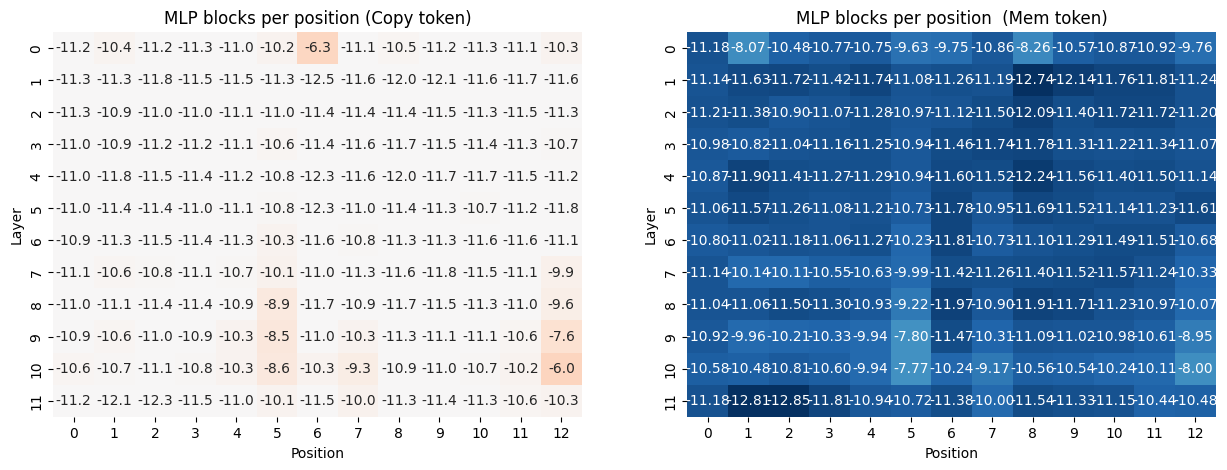

In [98]:
cp_score_mlp = circuit.residual_stram_track_target_all_len(target="copy", component="mlp_out")
mem_score_mlp = circuit.residual_stram_track_target_all_len(target="mem", component="mlp_out")

plot_heatmaps(cp_score_mlp, mem_score_mlp, center=-11, title1="MLP blocks per position (Copy token)", title2="MLP blocks per position  (Mem token)", interval=11)

OV circuit at all heads 33: 100%|██████████| 1/1 [00:00<00:00,  2.31it/s]


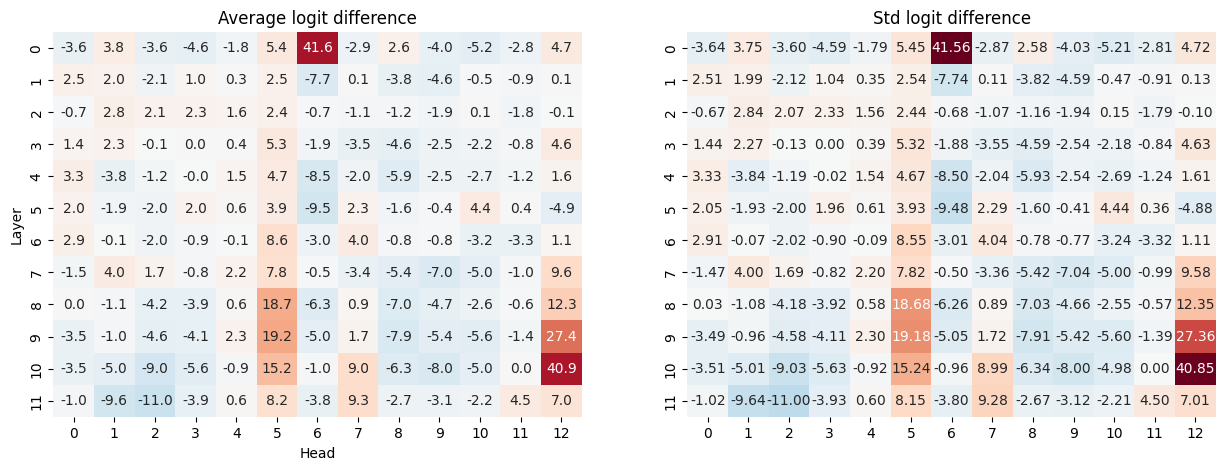

In [84]:
cp_score_attn = circuit.residual_stram_track_target_all_len(target="copy", component="mlp_out")
plot_heatmaps(cp_score_attn, cp_score_attn, title="MLP", interval=50)

## Sample orthogonal token

In [1]:
import sys
sys.path.append('..')
sys.path.append('../src')
sys.path.append('../data')

# from src.ablate_heads import Ablate, AblateMultiLen, OVCircuit
# from src.experiment import AblateMultiLen, OVCircuit, AttentionPattern, AblateMLP, AllCompenentProject
from src.dataset import TlensDataset, HFDataset  # noqa: E402
from src.experiment import LogitLens
# from src.dataset import MyDataset
from src.model import WrapHookedTransformer

from src.myplot import plot_heatmaps, barplot_head
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import einops

torch.set_grad_enabled(False)
%load_ext autoreload
%autoreload 2

/home/francesco/anaconda3/envs/torch/lib/python3.10/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
model = WrapHookedTransformer.from_pretrained("gpt2")
dataset = TlensDataset("../data/full_data_sampled_gpt2.json", model, slice=100)

Using pad_token, but it is not set yet.


Loaded pretrained model gpt2 into HookedTransformer
Dataset loaded from ../data/full_data_sampled_gpt2.json
Number of samples: 100


In [3]:
lens = LogitLens(dataset, model, 20)

In [ ]:
#!TODO debug lens with attention and index
#!TODO add the mean computation

In [13]:
lens.project_and_return_df(component="head", return_index=False, normalize="softmax")

100%|██████████| 1/1 [00:05<00:00,  5.81s/it]


tensor shape: torch.Size([12, 25, 12, 6])
torch.Size([6, 12, 12, 25])
tensor shape: torch.Size([12, 25, 12, 6])
torch.Size([6, 12, 12, 25])
tensor shape: torch.Size([12, 25, 12, 0])
torch.Size([0, 12, 12, 25])
tensor shape: torch.Size([12, 25, 12, 0])
torch.Size([0, 12, 12, 25])


100%|██████████| 2/2 [00:09<00:00,  4.95s/it]


tensor shape: torch.Size([12, 21, 12, 21])
torch.Size([21, 12, 12, 21])
tensor shape: torch.Size([12, 21, 12, 21])
torch.Size([21, 12, 12, 21])
tensor shape: torch.Size([12, 21, 12, 0])
torch.Size([0, 12, 12, 21])
tensor shape: torch.Size([12, 21, 12, 0])
torch.Size([0, 12, 12, 21])


100%|██████████| 2/2 [00:11<00:00,  5.53s/it]


tensor shape: torch.Size([12, 19, 12, 34])
torch.Size([34, 12, 12, 19])
tensor shape: torch.Size([12, 19, 12, 34])
torch.Size([34, 12, 12, 19])
tensor shape: torch.Size([12, 19, 12, 0])
torch.Size([0, 12, 12, 19])
tensor shape: torch.Size([12, 19, 12, 0])
torch.Size([0, 12, 12, 19])


100%|██████████| 1/1 [00:05<00:00,  5.14s/it]


tensor shape: torch.Size([12, 23, 12, 9])
torch.Size([9, 12, 12, 23])
tensor shape: torch.Size([12, 23, 12, 9])
torch.Size([9, 12, 12, 23])
tensor shape: torch.Size([12, 23, 12, 0])
torch.Size([0, 12, 12, 23])
tensor shape: torch.Size([12, 23, 12, 0])
torch.Size([0, 12, 12, 23])


100%|██████████| 1/1 [00:04<00:00,  4.79s/it]


tensor shape: torch.Size([12, 17, 12, 16])
torch.Size([16, 12, 12, 17])
tensor shape: torch.Size([12, 17, 12, 16])
torch.Size([16, 12, 12, 17])
tensor shape: torch.Size([12, 17, 12, 0])
torch.Size([0, 12, 12, 17])
tensor shape: torch.Size([12, 17, 12, 0])
torch.Size([0, 12, 12, 17])


100%|██████████| 1/1 [00:05<00:00,  5.77s/it]


tensor shape: torch.Size([12, 27, 12, 8])
torch.Size([8, 12, 12, 27])
tensor shape: torch.Size([12, 27, 12, 8])
torch.Size([8, 12, 12, 27])
tensor shape: torch.Size([12, 27, 12, 0])
torch.Size([0, 12, 12, 27])
tensor shape: torch.Size([12, 27, 12, 0])
torch.Size([0, 12, 12, 27])


100%|██████████| 1/1 [00:05<00:00,  5.23s/it]


tensor shape: torch.Size([12, 29, 12, 3])
torch.Size([3, 12, 12, 29])
tensor shape: torch.Size([12, 29, 12, 3])
torch.Size([3, 12, 12, 29])
tensor shape: torch.Size([12, 29, 12, 0])
torch.Size([0, 12, 12, 29])
tensor shape: torch.Size([12, 29, 12, 0])
torch.Size([0, 12, 12, 29])


100%|██████████| 1/1 [00:05<00:00,  5.88s/it]


tensor shape: torch.Size([12, 31, 12, 2])
torch.Size([2, 12, 12, 31])
tensor shape: torch.Size([12, 31, 12, 2])
torch.Size([2, 12, 12, 31])
tensor shape: torch.Size([12, 31, 12, 0])
torch.Size([0, 12, 12, 31])
tensor shape: torch.Size([12, 31, 12, 0])
torch.Size([0, 12, 12, 31])


100%|██████████| 1/1 [00:05<00:00,  5.54s/it]

tensor shape: torch.Size([12, 33, 12, 1])
torch.Size([1, 12, 12, 33])
tensor shape: torch.Size([12, 33, 12, 1])
torch.Size([1, 12, 12, 33])
tensor shape: torch.Size([12, 33, 12, 0])
torch.Size([0, 12, 12, 33])
tensor shape: torch.Size([12, 33, 12, 0])
torch.Size([0, 12, 12, 33])


,component,layer,position,mem,cp,mem_idx,cp_idx
0,H0,0,0,0.000028,0.000019,None,None
1,H1,0,0,0.000015,0.000007,None,None
2,H2,0,0,0.000017,0.000011,None,None
3,H3,0,0,0.000015,0.000006,None,None
4,H4,0,0,0.000018,0.000008,None,None
...,...,...,...,...,...,...,...
1723,H7,11,11,0.000063,0.000142,None,None
1724,H8,11,11,0.000029,0.000013,None,None
1725,H9,11,11,0.000035,0.000021,None,None
1726,H10,11,11,0.000039,0.000033,None,None


In [42]:
(4,4)

(4, 4)